<a href="https://colab.research.google.com/github/Pam2020/DataChallenge_HumanActivityPredictor/blob/main/DataChallenge_SravyaPamula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Challenge

**Objective**: Build a multi-class human activity classifier. 

**Data**: 3-axis accelerometer readings with a sample rate of 50 Hz from sensors placed at the chest and thigh. Available in the form of 6 csv files. 



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Getting the data and creating the dataset before modeling

In [ ]:
df_jumping_chest = pd.read_csv('/content/acc_jumping_chest.csv')
df_jumping_thigh = pd.read_csv('/content/acc_jumping_thigh.csv')
df_standing_chest = pd.read_csv('/content/acc_standing_chest.csv')
df_standing_thigh = pd.read_csv('/content/acc_standing_thigh.csv')
df_walking_chest = pd.read_csv('/content/acc_walking_chest.csv')
df_walking_thigh = pd.read_csv('/content/acc_walking_thigh.csv')

**Jumping datasets**

In [ ]:
df_jumping_chest.head()

,id,attr_time,attr_x,attr_y,attr_z
0,1,1438189988408,-5.199607,8.001422,0.754174
1,2,1438189988409,-5.206192,8.006210,0.758363
2,3,1438189988410,-5.209184,8.015787,0.749984
3,4,1438189988430,-5.212177,8.018182,0.748188
4,5,1438189988431,-5.212776,8.055291,0.739808


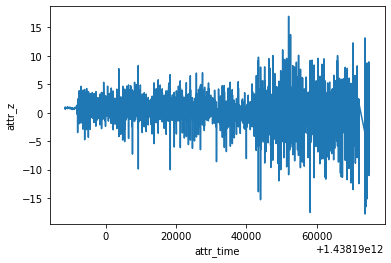

In [ ]:
sns.lineplot(x="attr_time", y="attr_z",
             data=df_jumping_chest)
plt.show()

In [ ]:
df_jumping_thigh.head()

,id,attr_time,attr_x,attr_y,attr_z
0,1,1438189988408,-0.131681,9.577405,0.044891
1,2,1438189988428,-0.147243,9.589376,0.035314
2,3,1438189988450,-0.146046,9.564238,0.046687
3,4,1438189988470,-0.161010,9.570223,0.026935
4,5,1438189988490,-0.174178,9.579201,0.028730


In [ ]:
print(df_jumping_chest.shape)
print(df_jumping_thigh.shape)

(4331, 5)
(4326, 5)


In [ ]:
df_jumping_chest['activity'] = 'jumping'
df_jumping_chest['sensor'] = 'chest'
df_jumping_thigh['activity'] = 'jumping'
df_jumping_thigh['sensor'] = 'thigh'
df_jumping_chest.head()


,id,attr_time,attr_x,attr_y,attr_z,activity,sensor
0,1,1438189988408,-5.199607,8.001422,0.754174,jumping,chest
1,2,1438189988409,-5.206192,8.006210,0.758363,jumping,chest
2,3,1438189988410,-5.209184,8.015787,0.749984,jumping,chest
3,4,1438189988430,-5.212177,8.018182,0.748188,jumping,chest
4,5,1438189988431,-5.212776,8.055291,0.739808,jumping,chest


In [ ]:
df_jumping_thigh.head()

,id,attr_time,attr_x,attr_y,attr_z,activity,sensor
0,1,1438189988408,-0.131681,9.577405,0.044891,jumping,thigh
1,2,1438189988428,-0.147243,9.589376,0.035314,jumping,thigh
2,3,1438189988450,-0.146046,9.564238,0.046687,jumping,thigh
3,4,1438189988470,-0.161010,9.570223,0.026935,jumping,thigh
4,5,1438189988490,-0.174178,9.579201,0.028730,jumping,thigh


**Standing datasets**

In [ ]:
print(df_standing_chest.shape)
print(df_standing_thigh.shape)

(32119, 5)
(32119, 5)


In [ ]:
df_standing_chest.head()

,id,attr_time,attr_x,attr_y,attr_z
0,1,1435991672008,1.321001,9.491214,1.198298
1,2,1435991672028,1.327585,9.501988,1.235408
2,3,1435991672048,1.368286,9.537302,1.222838
3,4,1435991672068,1.349133,9.581595,1.231817
4,5,1435991672088,1.369483,9.591770,1.204882


In [ ]:
df_standing_thigh.head()

,id,attr_time,attr_x,attr_y,attr_z
0,1,1435991672014,0.461482,9.572617,-0.302268
1,2,1435991672033,0.454300,9.607333,-0.388459
2,3,1435991672055,0.517746,9.612720,-0.404022
3,4,1435991672073,0.548871,9.603742,-0.427365
4,5,1435991672092,0.598550,9.610924,-0.518943


In [ ]:
df_standing_chest['activity'] = 'standing'
df_standing_chest['sensor'] = 'chest'
df_standing_thigh['activity'] = 'standing'
df_standing_thigh['sensor'] = 'thigh'
df_standing_chest.head()


,id,attr_time,attr_x,attr_y,attr_z,activity,sensor
0,1,1435991672008,1.321001,9.491214,1.198298,standing,chest
1,2,1435991672028,1.327585,9.501988,1.235408,standing,chest
2,3,1435991672048,1.368286,9.537302,1.222838,standing,chest
3,4,1435991672068,1.349133,9.581595,1.231817,standing,chest
4,5,1435991672088,1.369483,9.591770,1.204882,standing,chest


In [ ]:
df_standing_thigh.head()

,id,attr_time,attr_x,attr_y,attr_z,activity,sensor
0,1,1435991672014,0.461482,9.572617,-0.302268,standing,thigh
1,2,1435991672033,0.454300,9.607333,-0.388459,standing,thigh
2,3,1435991672055,0.517746,9.612720,-0.404022,standing,thigh
3,4,1435991672073,0.548871,9.603742,-0.427365,standing,thigh
4,5,1435991672092,0.598550,9.610924,-0.518943,standing,thigh


**Walking datasets**

In [ ]:
print(df_walking_chest.shape)
print(df_walking_thigh.shape)

(31950, 5)
(31949, 5)


In [ ]:
df_walking_chest.head()

,id,attr_time,attr_x,attr_y,attr_z
0,1,1435993159405,-2.160767,9.400234,0.565032
1,2,1435993159425,-2.176928,9.395446,0.621295
2,3,1435993159443,-2.151190,9.382876,0.588974
3,4,1435993159463,-2.135029,9.319430,0.545878
4,5,1435993159483,-2.168548,9.306262,0.586579


In [ ]:
df_walking_thigh.head()

,id,attr_time,attr_x,attr_y,attr_z
0,1,1435993159419,0.055665,9.621099,-0.011372
1,2,1435993159437,0.073622,9.554062,-0.077812
2,3,1435993159456,0.077812,9.537901,-0.155025
3,4,1435993159475,0.113725,9.567230,-0.159214
4,5,1435993159499,0.116717,9.599552,-0.104746


In [ ]:
df_walking_chest['activity'] = 'walking'
df_walking_chest['sensor'] = 'chest'
df_walking_thigh['activity'] = 'walking'
df_walking_thigh['sensor'] = 'thigh'
df_walking_chest.head()

,id,attr_time,attr_x,attr_y,attr_z,activity,sensor
0,1,1435993159405,-2.160767,9.400234,0.565032,walking,chest
1,2,1435993159425,-2.176928,9.395446,0.621295,walking,chest
2,3,1435993159443,-2.151190,9.382876,0.588974,walking,chest
3,4,1435993159463,-2.135029,9.319430,0.545878,walking,chest
4,5,1435993159483,-2.168548,9.306262,0.586579,walking,chest


In [ ]:
df_walking_thigh.head()

,id,attr_time,attr_x,attr_y,attr_z,activity,sensor
0,1,1435993159419,0.055665,9.621099,-0.011372,walking,thigh
1,2,1435993159437,0.073622,9.554062,-0.077812,walking,thigh
2,3,1435993159456,0.077812,9.537901,-0.155025,walking,thigh
3,4,1435993159475,0.113725,9.567230,-0.159214,walking,thigh
4,5,1435993159499,0.116717,9.599552,-0.104746,walking,thigh


### Merging the datasets

In [ ]:
dfs = [df_jumping_chest,  df_standing_chest, df_walking_chest, df_jumping_thigh, df_standing_thigh,df_walking_thigh]
final_df= pd.concat(dfs, axis=0,join="outer", ignore_index=True)


In [ ]:
final_df.shape

(136794, 7)

I drop the 'id' column as it does not give us any information for modeling. 

In [ ]:
final_df.drop('id', inplace = True, axis = 1)

In [ ]:
final_df.head()

,attr_time,attr_x,attr_y,attr_z,activity,sensor
0,1438189988408,-5.199607,8.001422,0.754174,jumping,chest
1,1438189988409,-5.206192,8.006210,0.758363,jumping,chest
2,1438189988410,-5.209184,8.015787,0.749984,jumping,chest
3,1438189988430,-5.212177,8.018182,0.748188,jumping,chest
4,1438189988431,-5.212776,8.055291,0.739808,jumping,chest


In [ ]:
final_df.shape

(136794, 6)

This is the final format of the dataset that we will be using for modeling. We have not lost any data as the column numbers add up to the columns of the final dataset. 

### Data Pre-processing

Let us do some basic data processing to check if the dataset is ready for modeling. Some of the things that need to be studied are:

1. How is the data distributed? It's time series data. 
2. Do we use the raw data or do we do some feature extraction?
3. Are the classes of the target variable balanced?



In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136794 entries, 0 to 136793
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   attr_time  136794 non-null  int64  
 1   attr_x     136794 non-null  float64
 2   attr_y     136794 non-null  float64
 3   attr_z     136794 non-null  float64
 4   activity   136794 non-null  object 
 5   sensor     136794 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 6.3+ MB


There are no null values in our dataset.

In [ ]:
final_df.isnull().sum()

attr_time    0
attr_x       0
attr_y       0
attr_z       0
activity     0
sensor       0
dtype: int64

In [ ]:
final_df.describe()

,attr_time,attr_x,attr_y,attr_z
count,1.367940e+05,136794.000000,136794.000000,136794.000000
mean,1.436132e+12,0.303223,9.090125,0.588134
std,5.349889e+08,2.890114,2.908771,2.490973
min,1.435992e+12,-19.454086,-19.608511,-19.608511
25%,1.435992e+12,-1.395071,8.377312,-0.469114
50%,1.435993e+12,0.277727,9.394249,0.714669
75%,1.435994e+12,1.631050,9.654019,1.815403
max,1.438190e+12,19.607914,19.608511,19.608511


We will sort the dataset based on the attr_time as this is a time series data.

In [ ]:
final_df.sort_values(by = 'attr_time', axis = 0, inplace = True)

In [ ]:
final_df

,attr_time,attr_x,attr_y,attr_z,activity,sensor
4331,1435991672008,1.321001,9.491214,1.198298,standing,chest
72726,1435991672014,0.461482,9.572617,-0.302268,standing,thigh
4332,1435991672028,1.327585,9.501988,1.235408,standing,chest
72727,1435991672033,0.454300,9.607333,-0.388459,standing,thigh
4333,1435991672048,1.368286,9.537302,1.222838,standing,chest
...,...,...,...,...,...,...
72723,1438190074951,7.414244,19.608511,-0.945111,jumping,thigh
4329,1438190074962,-3.828927,19.608511,-1.797447,jumping,chest
72724,1438190074972,5.132570,17.685370,10.947487,jumping,thigh
4330,1438190074982,-2.170344,17.461512,-1.324592,jumping,chest


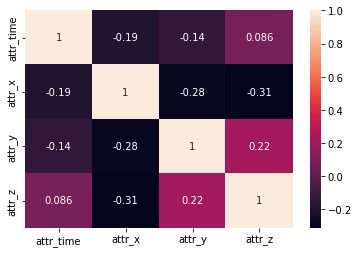

In [ ]:
# plotting correlation heatmap
correlation = sns.heatmap(final_df.corr(), annot=True)
  
# displaying heatmap
plt.show()

From the below plots we see that the accelerometer readings are recorded at different time points for the three different activites recorded. We also see that the readings along the x, y and z axes have both negative and positive values for jumping as the person jumping has to slow down at a certain height and return. This is not the case for standing. For walking also we observe negative values as the person can speed up or slow down while walking. 

The following plot shows that the target class is imbalanced. The jumping class has the fewest datapoints. 

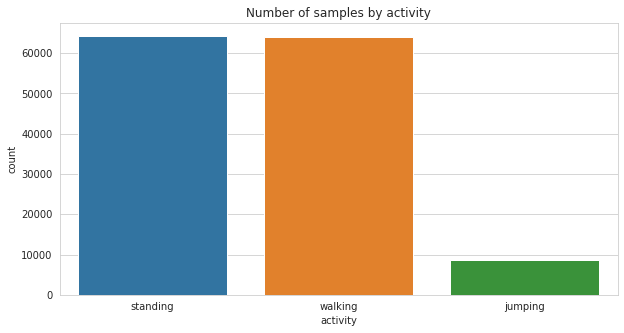

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize = (10, 5))
sns.countplot(x = 'activity', data = final_df)
plt.title('Number of samples by activity')
plt.show()

In [ ]:
final_df['activity'].value_counts()

standing    64238
walking     63899
jumping      8657
Name: activity, dtype: int64

The following points are observed:

1. 'activity' column in the target variable.
2. 'sensor' column is categorical. 'attr_time', 'attr_x', 'attr_y' and 'attr_z' are numerical. These need to be encoded before modeling. 
3. 'attr_time' corresponds to different time steps.
4. The numerical features lie of different scales. Therefore, we need to standardize the data before modeling. 
5. There isn't much correlation between the numerical columns as expected. As these are accelerations along the three axes that are independent. Here we keep all of them for modeling. 
6. We see that our target data is imbalanced. We have very less data for the jumping class. We will have to handle the class imbalance before modeling. 
7. Our data is raw time series data, there instead of sending this data directly for modeling, we need to do some feature extraction. 

### Feature Extraction

I will extract features such as mean, standard deviation, minimum value, maximum value, range and median. This is done using the windowing method where a certain range of rows are chosen for creating new features.

Prior to this process, I also create the x-train and x-test as we do not want to mix up our train and test data when doing the windowing process. This is done using the train-test split method of sklearn library.

Train-test split

In [ ]:
label_dict = {'standing':0, 'walking': 1, 'jumping': 2}
sensor_dict = {'chest': 0, 'thigh':1}
final_df = final_df.replace({'activity': label_dict})
final_df = final_df.replace({'sensor': sensor_dict})
final_df.head()

,attr_time,attr_x,attr_y,attr_z,activity,sensor
4331,1435991672008,1.321001,9.491214,1.198298,0,0
72726,1435991672014,0.461482,9.572617,-0.302268,0,1
4332,1435991672028,1.327585,9.501988,1.235408,0,0
72727,1435991672033,0.454300,9.607333,-0.388459,0,1
4333,1435991672048,1.368286,9.537302,1.222838,0,0


In [ ]:
from sklearn.model_selection import train_test_split

def generate_splits():
    y = final_df['activity']
    X = final_df[[x for x in final_df.columns if x != 'activity']]

    return train_test_split(X, y, test_size=0.25)

df_train, df_test, y_train, y_test = generate_splits()

print(f'Training examples: {df_train.shape[0]:,}')
print(f'Test examples: {df_test.shape[0]:,}')

Training examples: 102,595
Test examples: 34,199


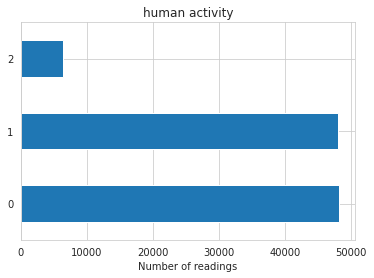

In [ ]:
y_train.value_counts().plot.barh()
plt.title('human activity')
plt.xlabel('Number of readings')
plt.show()

Creating the train dataset using statistical features

I notice that in this process of windowing, the jumping class is completely lost as we are using mode to filter the labels for each window. Therefore, we need to address the class imbalance before performing the windowing process.

In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
df_train, y_train = oversample.fit_resample(df_train, y_train)
df_test, y_test = oversample.fit_resample(df_test, y_test)

In [ ]:
df_train.shape
# initially the number of rows was 102,595 and now it is 144741

(144633, 5)

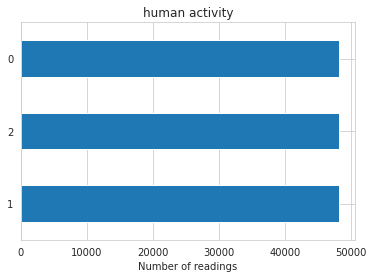

In [ ]:
y_train.value_counts().plot.barh()
plt.title('human activity')
plt.xlabel('Number of readings')
plt.show()

In [ ]:
import scipy.stats as stats

x_list = []
y_list = []
z_list = []
sensors = []
train_labels = []

window_size = 100
step_size = 50

# creating overlaping windows of size 50 with window-size 100
for i in range(0, df_train.shape[0] - window_size, step_size):
    xs = df_train['attr_x'].values[i: i + 100]
    ys = df_train['attr_y'].values[i: i + 100]
    zs = df_train['attr_z'].values[i: i + 100]
    label = stats.mode(y_train[i: i + 100])[0][0]
    sensor = stats.mode(df_train['sensor'].values[i:i+100])[0][0]

    x_list.append(xs)
    y_list.append(ys)
    z_list.append(zs)
    train_labels.append(label)
    sensors.append(sensor)

    # converting the signals from time domain to frequency domain using FFT
    # considering only first half of the signal and ignoring the first component
    x_list_fft = pd.Series(x_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
    y_list_fft = pd.Series(y_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
    z_list_fft = pd.Series(z_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])


# Statistical Features on raw x, y and z in time domain
X_train = pd.DataFrame()

# mean
X_train['attr_x_mean'] = pd.Series(x_list).apply(lambda x: x.mean())
X_train['attr_y_mean'] = pd.Series(y_list).apply(lambda x: x.mean())
X_train['attr_z_mean'] = pd.Series(z_list).apply(lambda x: x.mean())

# std dev
X_train['attr_x_std'] = pd.Series(x_list).apply(lambda x: x.std())
X_train['attr_y_std'] = pd.Series(y_list).apply(lambda x: x.std())
X_train['attr_z_std'] = pd.Series(z_list).apply(lambda x: x.std())

# min
X_train['attr_x_min'] = pd.Series(x_list).apply(lambda x: x.min())
X_train['attr_y_min'] = pd.Series(y_list).apply(lambda x: x.min())
X_train['attr_z_min'] = pd.Series(z_list).apply(lambda x: x.min())

# max
X_train['attr_x_max'] = pd.Series(x_list).apply(lambda x: x.max())
X_train['attr_y_max'] = pd.Series(y_list).apply(lambda x: x.max())
X_train['attr_z_max'] = pd.Series(z_list).apply(lambda x: x.max())

# range
X_train['attr_x_range'] = X_train['attr_x_max'] - X_train['attr_x_min']
X_train['attr_y_range'] = X_train['attr_y_max'] - X_train['attr_y_min']
X_train['attr_z_range'] = X_train['attr_z_max'] - X_train['attr_z_min']

# median
X_train['attr_x_median'] = pd.Series(x_list).apply(lambda x: np.median(x))
X_train['attr_y_median'] = pd.Series(y_list).apply(lambda x: np.median(x))
X_train['attr_z_median'] = pd.Series(z_list).apply(lambda x: np.median(x))

# sensor 
X_train['sensor'] = pd.Series(sensors)

# Statistical Features on raw x, y and z in frequency domain
# FFT mean
X_train['attr_x_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: x.mean())
X_train['attr_y_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: x.mean())
X_train['attr_z_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: x.mean())

# FFT std dev
X_train['attr_x_std_fft'] = pd.Series(x_list_fft).apply(lambda x: x.std())
X_train['attr_y_std_fft'] = pd.Series(y_list_fft).apply(lambda x: x.std())
X_train['attr_z_std_fft'] = pd.Series(z_list_fft).apply(lambda x: x.std())

# FFT min
X_train['attr_x_min_fft'] = pd.Series(x_list_fft).apply(lambda x: x.min())
X_train['attr_y_min_fft'] = pd.Series(y_list_fft).apply(lambda x: x.min())
X_train['attr_z_min_fft'] = pd.Series(z_list_fft).apply(lambda x: x.min())

# FFT max
X_train['attr_x_max_fft'] = pd.Series(x_list_fft).apply(lambda x: x.max())
X_train['attr_y_max_fft'] = pd.Series(y_list_fft).apply(lambda x: x.max())
X_train['attr_z_max_fft'] = pd.Series(z_list_fft).apply(lambda x: x.max())

# FFT range
X_train['attr_x_range_fft'] = X_train['attr_x_max_fft'] - X_train['attr_x_min_fft']
X_train['attr_y_range_fft'] = X_train['attr_y_max_fft'] - X_train['attr_y_min_fft']
X_train['attr_z_range_fft'] = X_train['attr_z_max_fft'] - X_train['attr_z_min_fft']

# FFT median
X_train['attr_x_median_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(x))
X_train['attr_y_median_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(x))
X_train['attr_z_median_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(x))

print(X_train.shape)

(2891, 37)


In [ ]:
X_train.head()

,attr_x_mean,attr_y_mean,attr_z_mean,attr_x_std,attr_y_std,attr_z_std,attr_x_min,attr_y_min,attr_z_min,attr_x_max,...,attr_z_min_fft,attr_x_max_fft,attr_y_max_fft,attr_z_max_fft,attr_x_range_fft,attr_y_range_fft,attr_z_range_fft,attr_x_median_fft,attr_y_median_fft,attr_z_median_fft
0,0.092165,9.253003,0.305895,2.945397,3.814695,2.218534,-8.284536,-15.697583,-5.915474,6.927623,...,2.207561,61.670569,77.519445,51.020937,60.138973,72.012781,48.813376,25.420244,32.898100,17.897124
1,0.368599,8.908310,0.471412,2.631167,3.788801,2.197821,-8.284536,-15.697583,-5.915474,7.249643,...,0.619482,53.233360,76.871909,45.870384,47.162341,68.696158,45.250902,24.757653,30.816406,16.976700
2,0.611587,8.651185,0.708726,2.686669,3.093686,2.628132,-5.197213,-5.918467,-13.122620,10.172364,...,4.299361,57.714072,51.204979,48.117367,56.373723,49.074000,43.818006,20.745939,31.868330,20.341182
3,0.084695,8.755482,0.629316,2.747492,3.482914,2.838416,-8.930372,-5.918467,-13.122620,10.172364,...,0.895432,65.071052,74.090112,58.804664,64.129490,67.592805,57.909232,23.184359,28.503506,23.986503
4,0.029078,9.416264,0.884221,2.424193,3.053887,2.330654,-8.930372,-5.768829,-3.915717,7.217321,...,1.259514,44.915718,59.315506,45.647377,43.442086,58.908487,44.387863,21.108200,24.225198,18.749479


In [ ]:
X_train['sensor'].value_counts()

0    1950
1     941
Name: sensor, dtype: int64

In [ ]:
Y_train = pd.Series(train_labels)

In [ ]:
Y_train.value_counts()

0    1067
1     990
2     834
dtype: int64

In [ ]:
import scipy.stats as stats

x_list = []
y_list = []
z_list = []
sensors = []
test_labels = []

window_size = 100
step_size = 50

# creating overlaping windows of size 50 with window-size 100
for i in range(0, df_test.shape[0] - window_size, step_size):
    xs = df_test['attr_x'].values[i: i + 100]
    ys = df_test['attr_y'].values[i: i + 100]
    zs = df_test['attr_z'].values[i: i + 100]
    label = stats.mode(y_test[i: i + 100])[0][0]
    sensor = stats.mode(df_test['sensor'].values[i:i+100])[0][0]

    x_list.append(xs)
    y_list.append(ys)
    z_list.append(zs)
    test_labels.append(label)
    sensors.append(sensor)

    # converting the signals from time domain to frequency domain using FFT
    # considering only first half of the signal and ignoring the first component
    x_list_fft = pd.Series(x_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
    y_list_fft = pd.Series(y_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
    z_list_fft = pd.Series(z_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])


# Statistical Features on raw x, y and z in time domain
X_test = pd.DataFrame()

# mean
X_test['attr_x_mean'] = pd.Series(x_list).apply(lambda x: x.mean())
X_test['attr_y_mean'] = pd.Series(y_list).apply(lambda x: x.mean())
X_test['attr_z_mean'] = pd.Series(z_list).apply(lambda x: x.mean())

# std dev
X_test['attr_x_std'] = pd.Series(x_list).apply(lambda x: x.std())
X_test['attr_y_std'] = pd.Series(y_list).apply(lambda x: x.std())
X_test['attr_z_std'] = pd.Series(z_list).apply(lambda x: x.std())

# min
X_test['attr_x_min'] = pd.Series(x_list).apply(lambda x: x.min())
X_test['attr_y_min'] = pd.Series(y_list).apply(lambda x: x.min())
X_test['attr_z_min'] = pd.Series(z_list).apply(lambda x: x.min())

# max
X_test['attr_x_max'] = pd.Series(x_list).apply(lambda x: x.max())
X_test['attr_y_max'] = pd.Series(y_list).apply(lambda x: x.max())
X_test['attr_z_max'] = pd.Series(z_list).apply(lambda x: x.max())

# range
X_test['attr_x_range'] = X_test['attr_x_max'] - X_test['attr_x_min']
X_test['attr_y_range'] = X_test['attr_y_max'] - X_test['attr_y_min']
X_test['attr_z_range'] = X_test['attr_z_max'] - X_test['attr_z_min']

# median
X_test['attr_x_median'] = pd.Series(x_list).apply(lambda x: np.median(x))
X_test['attr_y_median'] = pd.Series(y_list).apply(lambda x: np.median(x))
X_test['attr_z_median'] = pd.Series(z_list).apply(lambda x: np.median(x))

# sensor 
X_test['sensor'] = pd.Series(sensors)

# Statistical Features on raw x, y and z in frequency domain
# FFT mean
X_test['attr_x_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: x.mean())
X_test['attr_y_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: x.mean())
X_test['attr_z_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: x.mean())

# FFT std dev
X_test['attr_x_std_fft'] = pd.Series(x_list_fft).apply(lambda x: x.std())
X_test['attr_y_std_fft'] = pd.Series(y_list_fft).apply(lambda x: x.std())
X_test['attr_z_std_fft'] = pd.Series(z_list_fft).apply(lambda x: x.std())

# FFT min
X_test['attr_x_min_fft'] = pd.Series(x_list_fft).apply(lambda x: x.min())
X_test['attr_y_min_fft'] = pd.Series(y_list_fft).apply(lambda x: x.min())
X_test['attr_z_min_fft'] = pd.Series(z_list_fft).apply(lambda x: x.min())

# FFT max
X_test['attr_x_max_fft'] = pd.Series(x_list_fft).apply(lambda x: x.max())
X_test['attr_y_max_fft'] = pd.Series(y_list_fft).apply(lambda x: x.max())
X_test['attr_z_max_fft'] = pd.Series(z_list_fft).apply(lambda x: x.max())

# FFT range
X_test['attr_x_range_fft'] = X_test['attr_x_max_fft'] - X_test['attr_x_min_fft']
X_test['attr_y_range_fft'] = X_test['attr_y_max_fft'] - X_test['attr_y_min_fft']
X_test['attr_z_range_fft'] = X_test['attr_z_max_fft'] - X_test['attr_z_min_fft']

# FFT median
X_test['attr_x_median_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(x))
X_test['attr_y_median_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(x))
X_test['attr_z_median_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(x))

print(X_test.shape)

(960, 37)


In [ ]:
Y_test = pd.Series(test_labels)
Y_test.value_counts()

0    371
1    314
2    275
dtype: int64

### Modeling

Step 1: Building pipelines

Step 2: Modeling

Step 3: Evaluating the performance metrics

The models used to build the classifier are:
1. SVM
2. Logistic regression

I choose a simple logistic regression to check if the SVM which is more complex than the logistic regression performs better or worse.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
categorical_features = ['sensor']
numerical_features = [x for x in X_train.columns if x != 'sensor']

In [ ]:
processing_pipeline = ColumnTransformer(transformers=[
        ('numerical_scaling', StandardScaler(), numerical_features),
        ('dummys', OneHotEncoder(drop='first'), categorical_features)]
    )

In [ ]:
modeling_pipeline = Pipeline([
        ('data_processing', processing_pipeline),
        ('svm', SVC())])

As we noted that our target class is imbalanced, accuracy is not a good choice to evaluate our model performance. Therefore, I am using recall as the scoring method.

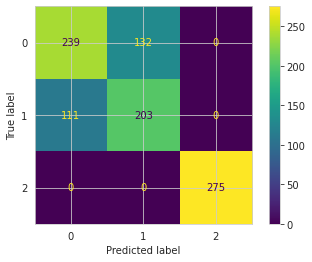

In [ ]:
param_grid = [
  {'svm__C': [0.01, 0.1, 1, 10, 100, 1000]}
 ]

results = GridSearchCV(estimator=modeling_pipeline, param_grid=param_grid, scoring='accuracy', refit=True, cv=5)
results = results.fit(X_train, Y_train)
preds = results.predict(X_test)
preds_train = results.predict(X_train)
ConfusionMatrixDisplay.from_estimator(results, X_test, Y_test)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, preds_train))
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1067
           1       0.82      0.79      0.80       990
           2       1.00      1.00      1.00       834

    accuracy                           0.87      2891
   macro avg       0.88      0.88      0.88      2891
weighted avg       0.87      0.87      0.87      2891

              precision    recall  f1-score   support

           0       0.68      0.64      0.66       371
           1       0.61      0.65      0.63       314
           2       1.00      1.00      1.00       275

    accuracy                           0.75       960
   macro avg       0.76      0.76      0.76       960
weighted avg       0.75      0.75      0.75       960



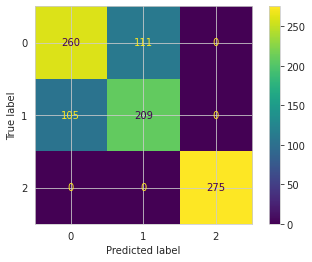

In [ ]:
from sklearn.linear_model import LogisticRegression

modeling_pipeline_new = Pipeline([
        ('data_processing', processing_pipeline),
        ('lgreg',LogisticRegression(class_weight='balanced', solver='liblinear'))])

param_grid = [
  {'lgreg__C': [0.01, 0.1, 1, 10, 100, 1000]}
 ]

results_lg = GridSearchCV(estimator=modeling_pipeline_new, param_grid=param_grid, scoring='accuracy', refit=True, cv=5)
result_lg = results_lg.fit(X_train, Y_train)
preds_lg_train = results_lg.predict(X_train)
preds_lg = results_lg.predict(X_test)
ConfusionMatrixDisplay.from_estimator(results_lg, X_test, Y_test)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, preds_lg_train))
print(classification_report(Y_test, preds_lg))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72      1067
           1       0.71      0.64      0.67       990
           2       1.00      1.00      1.00       834

    accuracy                           0.78      2891
   macro avg       0.80      0.80      0.80      2891
weighted avg       0.79      0.78      0.78      2891

              precision    recall  f1-score   support

           0       0.71      0.70      0.71       371
           1       0.65      0.67      0.66       314
           2       1.00      1.00      1.00       275

    accuracy                           0.78       960
   macro avg       0.79      0.79      0.79       960
weighted avg       0.78      0.78      0.78       960



As shown in the classification report, both these models perfom similar. When the target class disribution is imbalanced, then accuracy is not a good metric as it skews the denominator for the minority class. However, here we have already handled the class imbalance using the SMOTE method. Therefore, we could also use accuracy score as the metric to evaluate the model. Based on accuracy scores, both these models give the same results.

Based on other metrics such as the precision, recall and the f1 score, the two models perform same in terms of classifying the class 'jumping' class. The SVM model performs better at classifying the 'standing' and 'walking' classes. 

### Bonus questions

1. What are the different ways to deal with class imbalance?

Class imbalance can be handling using oversampling or undersampling methods. In the case of oversampling, the minority class is oversampled synthetically. In the case of undersampling, the majority class data is removed to make the classes balanced. In this work, I used the SMOTE method which expands to synthetic minority oversampling technique which is available as  apart of the imbalanced learn library in Python.

2. What can be inferred from a model that has a perfect training accuracy but doesn't perform well with testing data? Suggest a potential solution to overcome such differences.

If a model performs well on the train data (perfect train accuracy) and performs poorly on test data (poor test accuracy), this could mean that the model is overfit to the train data. This can be handled by using regularization methods which involves penalizing the model if its complexity increases.

3. Imagine that one of the feature values you found is much larger than the others, how do you deal with them?

If one of the feature values in the dataset is large compared to others, then we need to scale it. Standard scalar is mostly used to before modeling to make sure that all the numerical features lie on the same scale. 

4. PCA is a dimensionality reduction technique that can be used to reduce the number of features in the dataset by picking principle components that capture most of the variation in the dataset. I have not used PCA in this work due to lack of time. 

5. When you have an imbalanced class distribution, it is not a good idea to use accuracy as the metric. In this case, precision and recall can be used. Another metric that captures both precision and recall is the F1 score. 
